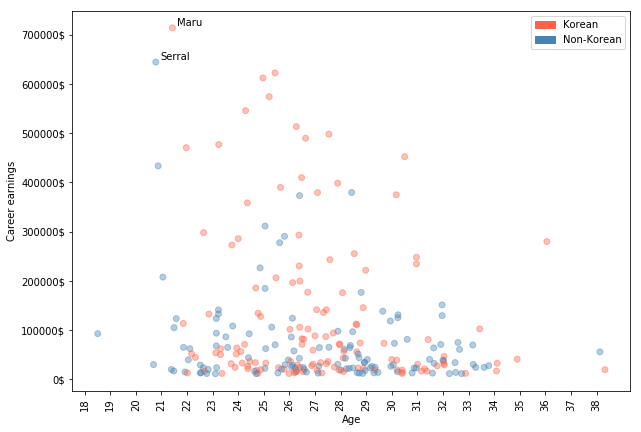

In [16]:
%matplotlib inline

import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches

# load the data
players = pd.read_csv('player_db.csv', low_memory=False)
earnings = pd.read_csv('earnings_db.csv', low_memory=False)

# need a little clean up since non-values in 'BIRTHDATE' can take two different forms 
players['BIRTHDATE'] = players['BIRTHDATE'].map(lambda s: float('nan') if s == '\\N' else s)

# the most earning players
players['TOTAL_EARNINGS'] = earnings.groupby('PLAYER_ID')['EARNINGS'].sum()
most_earning = players.dropna(subset=['BIRTHDATE'])['TOTAL_EARNINGS'].sort_values(ascending=False)[:250]

# days since birthday to make a more detailed scatter plot 
def days_since_date(d):
    return (date.today()-d).days
days_since_bday = players.loc[most_earning.index, 'BIRTHDATE'].map(lambda s: days_since_date(date.fromisoformat(s)))

# we plot the career earnings of players against their age
plt.figure(figsize=(10, 7))
colors = players.loc[most_earning.index, 'COUNTRY'].map(lambda s: 'tomato' if s == 'KR' else 'steelblue')
plt.scatter(days_since_bday, most_earning.values, c=colors.values, alpha=0.4)
range_of_dates = [date(year, 1, 1) for year in range(1981, 2002)]
plt.xticks([days_since_date(d) for d in range_of_dates], [2019-d.year for d in range_of_dates], rotation='vertical')

plt.ylabel('Career earnings')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d$'))
plt.xlabel('Age')

for i in range(0,2):
    index = most_earning.index[i]
    plt.annotate(xy=(days_since_bday[index]+70, most_earning[index]+4000), s=players.loc[index,'NICKNAME'])

foreign_patch = mpatches.Patch(color='steelblue', label='Non-Korean')
korean_patch = mpatches.Patch(color='tomato', label='Korean')
plt.legend(handles=[korean_patch, foreign_patch], loc='upper right')
plt.show()